In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics._plot.roc_curve import roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression


# UCI란?

https://archive.ics.uci.edu/datasets

* 캘리포니아 어바인 대학의 머신러닝 및 지능형 시스템 센터에서 호스팅하고 유지 관리합니다.이것은 원래 UC 어바인의 대학원생인 David Aha에 의해 만들어졌습니다.

In [2]:
!pip install ucimlrepo

In [3]:
# UCI의 데이터셋을 이렇게 사용하는 것입니다.
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

```
Fixed Acidity (고정 산도): 와인의 고정된 산성 성분. 산은 와인의 맛과 pH에 영향을 미칩니다.

Volatile Acidity (휘발성 산도): 와인에 존재하는 휘발성 산성 성분. 적절한 양의 휘발성 산성은 와인의 신선함을 나타냅니다.

Citric Acid (구연산): 와인에 포함된 구연산의 양. 구연산은 신선하고 과일 같은 맛을 제공합니다.

Residual Sugar (잔류 설탕): 와인의 제조과정 중에 남아 있는 설탕의 양. 낮은 잔류 설탕은 건조한 와인을, 높은 잔류 설탕은 단맛을 나타냅니다.

Chlorides (염화물): 와인에 포함된 염화물의 양. 너무 많은 양은 와인의 품질을 저하시킬 수 있습니다.

Free Sulfur Dioxide (자유 이산화황): 이산화황은 와인을 살균하고 산화를 방지하는 역할을 합니다. 자유 이산화황은 그 역할을 하는데 얼마나 성공적인지 나타냅니다.

Total Sulfur Dioxide (총 이산화황): 와인에 총 이산화황의 양. 안정성과 보존을 위해 적절한 양의 이산화황이 필요합니다.

Density (밀도): 와인의 밀도. 이는 주로 알코올 함량과 관련이 있습니다.

pH: 와인의 산성 또는 염기성 정도를 나타내는 척도.

Sulphates (황산염): 와인에 함유된 황산염의 양. 황산염은 마이크로 생물의 성장을 억제하는 데 사용됩니다.

Alcohol (알코올 도수): 와인의 알코올 함량. 알코올 도수는 와인의 맛과 향을 형성하는 중요한 요소 중 하나입니다.


```

In [4]:
# data와 target을 합친다.
energy_df = X
energy_df['quality'] = y
energy_df

<ipython-input-4-da402bfe88c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['quality'] = y


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
energy_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## **이상치가 있는 것 같으니 확인**

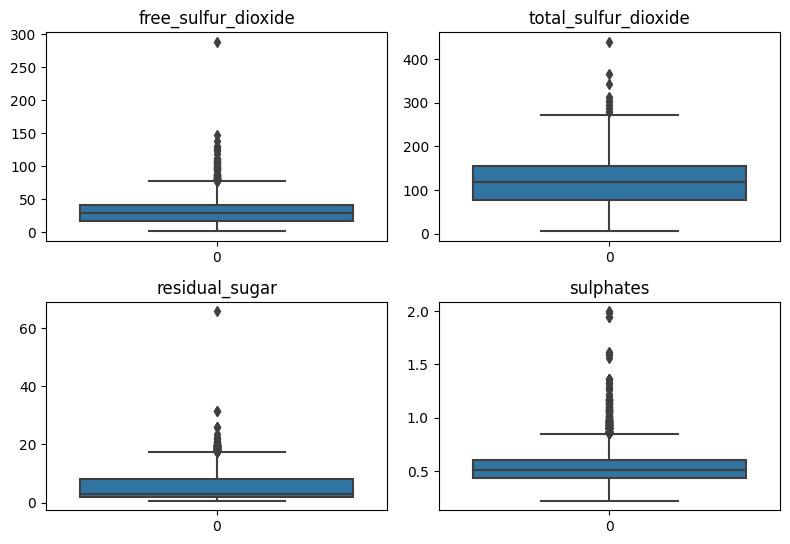

In [7]:
# 이상치 확인합시다.
col = ['free_sulfur_dioxide', 'total_sulfur_dioxide', 'residual_sugar', 'sulphates']

def boxPlot(col):
    plt.figure(figsize=(8, 8))
    for i in range(len(col)):
        plt.subplot(3, 2, i+1)
        sns.boxplot(energy_df[col[i]])
        plt.title(col[i])
    plt.tight_layout()
    plt.show()

boxPlot(col)

### free_sulfur_dioxide, residual_sugar 이상치 지우기

In [8]:
# 이상치 지우기
energy_df = energy_df[(energy_df['free_sulfur_dioxide'] != 289) & (energy_df['residual_sugar'] < 65)]

# 잘 지웠는지 확인
energy_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,7.215389,0.339582,0.318600,5.434334,0.056032,30.488992,115.687837,0.994690,3.218440,0.531227,10.491614,5.818784
std,1.296539,0.164476,0.145296,4.699109,0.035038,17.457690,56.384471,0.002948,0.160774,0.148810,1.192801,0.872686
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [9]:
# 결측치 확인
energy_df.isna().mean() # 결측치 없음

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [361]:
n_energy_df = RobustScaler().fit_transform(energy_df)
energy_df = pd.DataFrame(n_energy_df, columns=energy_df.columns.tolist())
energy_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,0.165684,0.291659,0.061432,0.386402,0.334537,0.062041,-0.029268,-0.042999,0.040192,0.124865,0.106452,-0.181216
std,0.997338,0.967505,1.037827,0.745890,1.297708,0.727404,0.713727,0.634041,0.765592,0.875351,0.662667,0.872686
min,-2.461538,-1.235294,-2.214286,-0.380952,-1.407407,-1.166667,-1.417722,-1.673118,-2.333333,-1.705882,-1.277778,-3.000000
25%,-0.461538,-0.352941,-0.428571,-0.190476,-0.333333,-0.500000,-0.518987,-0.548387,-0.476190,-0.470588,-0.444444,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.647059,0.571429,0.809524,0.666667,0.500000,0.481013,0.451613,0.523810,0.529412,0.555556,0.000000
max,6.846154,7.588235,9.642857,4.539683,20.888889,4.895833,3.145570,3.313978,3.809524,8.764706,2.555556,3.000000


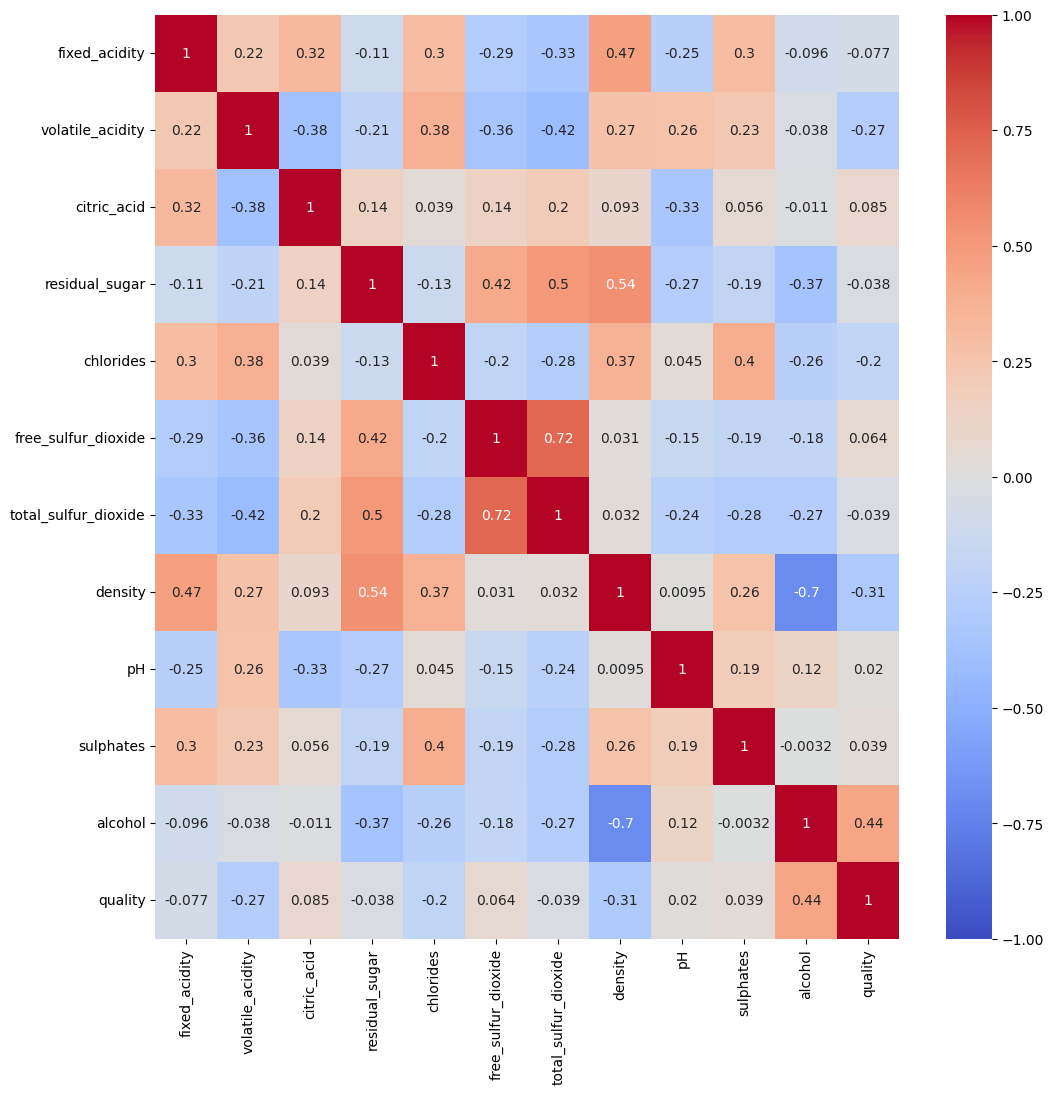

In [94]:
# 데이터 상관관계 확인
plt.figure(figsize=(12, 12))
sns.heatmap(energy_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

### train, test 데이터 나누기

In [95]:
X = energy_df.drop('quality', axis=1)
y = energy_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('<<shape>>')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

<<shape>>
X_train: (5196, 11), y_train: (5196,)
X_test: (1299, 11), y_test: (1299,)


### 분류
분류할 라벨은 3등급부터 9등급 까지이다.  
아래 분류기들을 각각 사용하여 비교해보자.

* SVC
* Decision Tree
* Logistic Regression
* Random Forest

# 1. SCV사용하고 점수 확인하기

In [96]:
score = {}
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [97]:
accuracy_score(y_test, svc_pred)
confusion_matrix(y_test, svc_pred)
print(classification_report(y_test, svc_pred))


              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         4
        -2.0       0.00      0.00      0.00        38
        -1.0       0.60      0.64      0.62       428
         0.0       0.56      0.71      0.62       592
         1.0       0.59      0.25      0.35       203
         2.0       0.00      0.00      0.00        33
         3.0       0.00      0.00      0.00         1

    accuracy                           0.57      1299
   macro avg       0.25      0.23      0.23      1299
weighted avg       0.54      0.57      0.54      1299



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
ras = roc_auc_score(y_test, svc.predict_proba(X_test), multi_class='ovr')
score['SVC'] = ras

In [99]:
score

{'SVC': 0.8245978397198749}

## 1-1. SVC로 더 해보자
SVC의 성능을 올리는 방법은 무엇이 있을지 알아본다.  
현재 분류기는 멀티 클래스 분류를 하는중임.


### 1-1-1. 부스팅
* 부스팅을 사용하여 비교적 약한 분류기인 svc를 강하게 만들어보자.
* 사용된 부스팅 분류기는 AdaBoostClassifier이다.

In [100]:
%%time
ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=50, random_state=42)
ada_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=SVC(probability=True), random_state=42)

In [101]:
ras = roc_auc_score(y_test, ada_svc.predict_proba(X_test), multi_class='ovr')


In [102]:
score['ADA_SVC'] = ras

In [103]:
score

{'SVC': 0.8245978397198749, 'ADA_SVC': 0.7881415284677875}

### 1-1-2. CV
* Cross Validation을 사용하여 성능을 일반화한다.
* 사용된 CV는 StratifiedKFold이다.


In [104]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

for train_index, test_index in skf.split(X, y):
    skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
    skf_y_train, skf_y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    svc.fit(X_train, y_train)

    # 예측 및 ROC-AUC 스코어 계산
    roc_auc = roc_auc_score(y_test, svc.predict_proba(X_test), multi_class='ovr')
    roc_auc_scores.append(roc_auc)

score['CV_SVC'] = np.mean(roc_auc_scores)

CPU times: user 29.8 s, sys: 335 ms, total: 30.2 s
Wall time: 30.7 s


In [105]:
score

{'SVC': 0.8245978397198749,
 'ADA_SVC': 0.7881415284677875,
 'CV_SVC': 0.8240825246146871}

# 2. Logistic Regression 사용하고 점수 확인하기

In [106]:
%%time
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

CPU times: user 425 ms, sys: 278 ms, total: 704 ms
Wall time: 949 ms


In [109]:
ras = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')

In [110]:
score['Logistic Regression'] = ras

In [111]:
score

{'SVC': 0.8245978397198749,
 'ADA_SVC': 0.7881415284677875,
 'CV_SVC': 0.8240825246146871,
 'Logistic Regression': 0.7686635039104157}

## 2-1. 발생한 문제

```
"//usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."
```
처음에 정규화를 해주지 않아서 요런 경고를 받게 되었다.  
정규화를 했더니 해결되었다.  
정규화는 RobustScaler를 사용하였고, 그 이유는 부스팅 기법이 이상치에 민감하기 때문에 성능에 도움을 주고자였다.  

## 2-2. solver
* solver는 최적화에 사용되는 알고리즘을 설정하는 매개변수이다.
* 기본값인 lbfgs는 작은 데이터셋에 적합하기 때문에 위와 같은 경고가 발생한다.
* saga로 설정해주면 경고가 사라진다.
* sag, saga는 경사 하강법을 사용하며, 빠르다.

# 3. DecisionTreeClassifier 사용하여 점수 확인하기

In [118]:
%%time
DTC1 = DecisionTreeClassifier(random_state=42)
DTC1.fit(X_train, y_train)
DTC1_pred = DTC1.predict(X_test)

CPU times: user 52 ms, sys: 1.96 ms, total: 53.9 ms
Wall time: 54.2 ms


In [119]:
ras = roc_auc_score(y_test, DTC1.predict_proba(X_test), multi_class='ovr')

In [120]:
ras

0.6627170862935972

In [144]:
%%time
DTC2 = DecisionTreeClassifier(max_depth=2, random_state=42)
DTC2.fit(X_train, y_train)
DTC2_pred = DTC2.predict(X_test)

CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 13.2 ms


In [145]:
ras = roc_auc_score(y_test, DTC2.predict_proba(X_test), multi_class='ovr')

In [146]:
ras

0.7031730969634241

In [147]:
DTC2.get_depth()

2

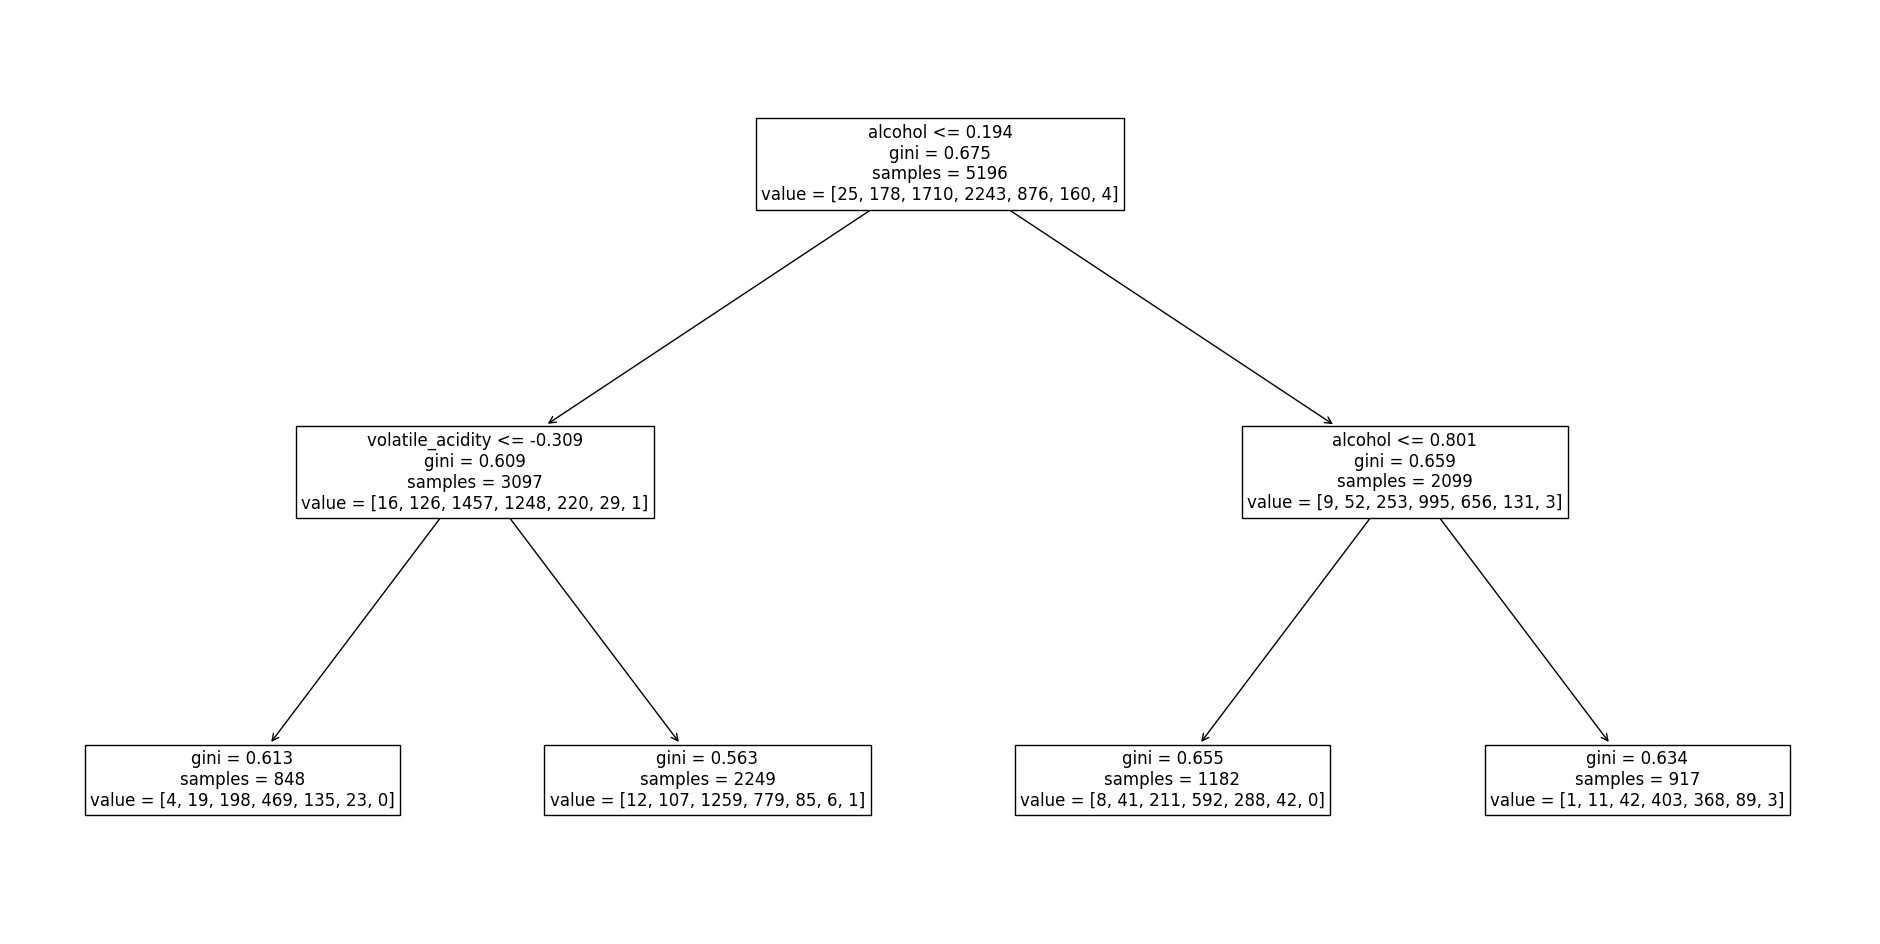

In [148]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
plot_tree(DTC2, max_depth=2, fontsize=12, feature_names=X_train.columns)
plt.show()

## 3-1. 의사결정나무와 GBM
* SVC에서는 Adaboost 기법을 사용했지만 이번엔 GBM을 사용해본다.
* GBM은 약한 모델을 초기 모델로 사용하는데 기본적으로 의사결정나무가 사용된다.

In [149]:
%%time
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_leaf=1, subsample=1.0)
GBC.fit(X_train, y_train)

CPU times: user 7.46 s, sys: 13.7 ms, total: 7.48 s
Wall time: 7.61 s


GradientBoostingClassifier()

In [150]:
ras = roc_auc_score(y_test, GBC.predict_proba(X_test), multi_class='ovr')

In [151]:
ras

0.7780977295951734

In [154]:
score['Decision Tree Classifier'] = ras

In [155]:
score

{'SVC': 0.8245978397198749,
 'ADA_SVC': 0.7881415284677875,
 'CV_SVC': 0.8240825246146871,
 'Logistic Regression': 0.7686635039104157,
 'Decision Tree Classifier': 0.7780977295951734}

# 4. Random Forest 사용하여 점수 확인하기

In [162]:
%%time
RFC1 = RandomForestClassifier(random_state=42)
RFC1.fit(X_train, y_train)

CPU times: user 1.23 s, sys: 13.7 ms, total: 1.25 s
Wall time: 2.14 s


RandomForestClassifier(random_state=42)

In [163]:
ras = roc_auc_score(y_test, RFC1.predict_proba(X_test), multi_class='ovr')

In [161]:
ras

0.8518672963907712

In [189]:
# 현재 모델의 max_depth를 확인하는 코드
# 첫 번째 트리에 접근
first_tree = RFC1.estimators_[0]

# 트리의 깊이 확인
depth = first_tree.tree_.max_depth

print('깊이: ', depth)

깊이:  29


## 4-1. 하이퍼 파라미터 수정
* 위에서 깊이를 확인하였다. 해당 깊이보다 max_depth를 크게 설정해도 결과는 똑같다.

In [227]:
%%time
RFC2 = RandomForestClassifier(max_depth=21, random_state=42)
RFC2.fit(X_train, y_train)

# 2부터 29까지중 가장 점수가 높은 깊이.

CPU times: user 1.26 s, sys: 51.8 ms, total: 1.31 s
Wall time: 1.37 s


RandomForestClassifier(max_depth=21, random_state=42)

In [228]:
ras = roc_auc_score(y_test, RFC2.predict_proba(X_test), multi_class='ovr')

In [229]:
ras

0.8567453578619021

In [275]:
%%time
RFC3 = RandomForestClassifier(n_estimators=188, max_depth=21, random_state=42)
RFC3.fit(X_train, y_train)

# max_depth를 고정하고 찾은 n_estimators의 최적값

CPU times: user 2.33 s, sys: 42.7 ms, total: 2.38 s
Wall time: 2.49 s


RandomForestClassifier(max_depth=21, n_estimators=188, random_state=42)

In [276]:
ras = roc_auc_score(y_test, RFC3.predict_proba(X_test), multi_class='ovr')

In [277]:
ras

0.8706211559920533

* Random Search를 통해 최적의 하이퍼 파라미터 찾기

In [285]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RS = RandomizedSearchCV(
    estimator=RFC1,
    param_distributions=param_dist,
    n_iter=10,  # 무작위로 샘플링할 조합의 수
    cv=5,       # 교차 검증의 폴드 수
    scoring='accuracy',  # 성능 평가 지표
    random_state=42,
    n_jobs=-1   # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
)

# 훈련 데이터로 최적의 하이퍼파라미터 찾기
RS.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [286]:
# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", RS.best_params_)

# 교차 검증을 통한 성능 출력
print("Best CV Score (Accuracy):", RS.best_score_)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best CV Score (Accuracy): 0.6545444954468054


In [287]:
%%time
RFC4 = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, min_samples_leaf=2, min_samples_split=5)
RFC4.fit(X_train, y_train)

CPU times: user 2.26 s, sys: 26.9 ms, total: 2.29 s
Wall time: 2.36 s


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [289]:
ras = roc_auc_score(y_test, RFC4.predict_proba(X_test), multi_class='ovr')

In [290]:
ras

0.8761446581448512

In [307]:
# param 개수를 늘려서 다시
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 22, 25],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

RS = RandomizedSearchCV(
    estimator=RFC1,
    param_distributions=param_dist,
    n_iter=10,  # 무작위로 샘플링할 조합의 수
    cv=5,       # 교차 검증의 폴드 수
    scoring='roc_auc',  # 성능 평가 지표
    random_state=42,
    n_jobs=-1   # 병렬 처리를 위한 CPU 코어 수 (-1은 모든 가능한 코어 사용)
)

# 훈련 데이터로 최적의 하이퍼파라미터 찾기
RS.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 22, 25],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='roc_auc')

In [309]:
# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", RS.best_params_)

# 교차 검증을 통한 성능 출력
print("Best CV Score (Accuracy):", RS.best_score_)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 25}
Best CV Score (Accuracy): nan


In [354]:
%%time
RFC5 = RandomForestClassifier(n_estimators=180, max_depth=22, random_state=42, min_samples_leaf=2, min_samples_split=3)
RFC5.fit(X_train, y_train)

CPU times: user 2.14 s, sys: 22.7 ms, total: 2.16 s
Wall time: 2.44 s


RandomForestClassifier(max_depth=22, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=180, random_state=42)

In [355]:
ras = roc_auc_score(y_test, RFC5.predict_proba(X_test), multi_class='ovr')

In [357]:
ras
# 0.8765349484258856
# 0.8777186830369356
# 0.8780635612831877
# 0.8778044318436263

0.8784448221688407

0.8784448221688407

In [358]:
score['Random Forest Classifier'] = ras

In [359]:
score

{'SVC': 0.8245978397198749,
 'ADA_SVC': 0.7881415284677875,
 'CV_SVC': 0.8240825246146871,
 'Logistic Regression': 0.7686635039104157,
 'Decision Tree Classifier': 0.7780977295951734,
 'Random Forest Classifier': 0.8787250966618088}

# 결론
* SVC가 높게 나온 것은 OverFitting일 가능성이 있기 때문인 것 같다.
* AdaBoost 기법을 사용한 SVC는 이상치 때문에 부스팅에도 성능이 낮아지게 된 것으로 보인다.
* Logistic Regression의 경우도 마찬가지로 이상치 때문에 성능이 낮게 나온것으로 보인다.
* Random Forest Classifier를 사용함으로 위의 이유들이 어느정도 증명이 된 것 같다.
* 정규화를 진행하였음에도 이상치에 영향을 받은 것 같아서 데이터를 다시 확인해보앗다.

# 추가: 데이터 다시 확인

In [367]:
energy_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,0.165684,0.291659,0.061432,0.386402,0.334537,0.062041,-0.029268,-0.042999,0.040192,0.124865,0.106452,-0.181216
std,0.997338,0.967505,1.037827,0.745890,1.297708,0.727404,0.713727,0.634041,0.765592,0.875351,0.662667,0.872686
min,-2.461538,-1.235294,-2.214286,-0.380952,-1.407407,-1.166667,-1.417722,-1.673118,-2.333333,-1.705882,-1.277778,-3.000000
25%,-0.461538,-0.352941,-0.428571,-0.190476,-0.333333,-0.500000,-0.518987,-0.548387,-0.476190,-0.470588,-0.444444,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.647059,0.571429,0.809524,0.666667,0.500000,0.481013,0.451613,0.523810,0.529412,0.555556,0.000000
max,6.846154,7.588235,9.642857,4.539683,20.888889,4.895833,3.145570,3.313978,3.809524,8.764706,2.555556,3.000000


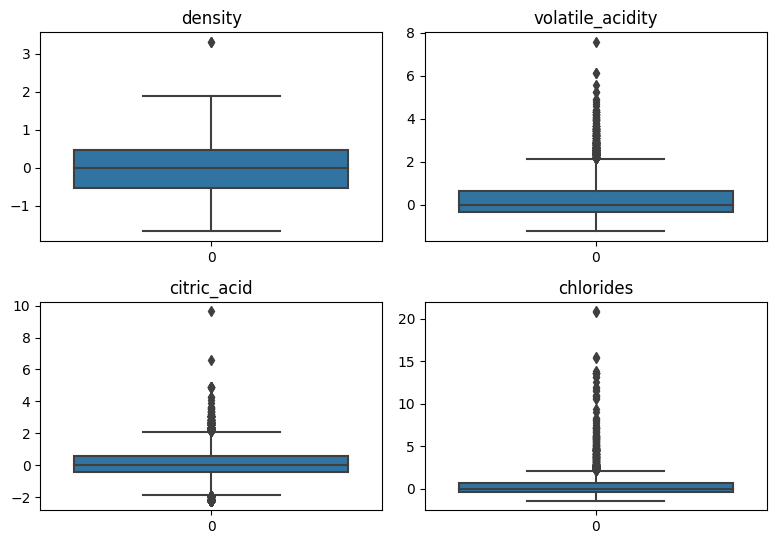

In [372]:
# 이상치 확인합시다.
col = ['density', 'volatile_acidity', 'citric_acid', 'chlorides']

def boxPlot(col):
    plt.figure(figsize=(8, 8))
    for i in range(len(col)):
        plt.subplot(3, 2, i+1)
        sns.boxplot(energy_df[col[i]])
        plt.title(col[i])
    plt.tight_layout()
    plt.show()

boxPlot(col)

# 추가 결론
* Robust Scaling을 진행하여 이상치에 민감하지 않은 데이터를 만드는 것이 목표였다.
* 이상치에 덜 민감한 데이터를 만들었으나 조금 더 가공을 한 후에 학습과 예측을 진행했다면 roc_auc_score가 더 높았을 것이다.